# Examining Existing Code with Copilot

One way we can use Copilot is to understand existing code. This can be useful when we receive someone else's code, when try to understand new code from another source (such as examples from the web), or when Copilot or another tool has generated code for us. Using Copilot, or a similar tool to explain the code can help us to understand it and integrate it into our own codebase, and to expand our knowledge of what is possible in the language.

## Understanding Functions

The easiest way to get an explanation of the code is by highlighting it then writing a message in the Copilot chat asking it to explain it. Copilot will often try to break it down into stages, giving a high-level explanation. Some useful follow-up questions might be:

* What problem does the code solve?
* When might I use this code? 
* What does the line containing [X] do?
* Which of these functions should I call to achieve [X]?
* What does the syntax [X] mean?
* Tell me more about the function [X].
* What information does the variable [X] hold?
* What data type is variable [X]?
* What is the purpose of the function [X]?

There are a lot of questions you could ask - the key is to take a moment to consider the code, what you understand, what you don't, and how you want to use the code.

In general, Copilot will give better explanations to smaller pieces of code. If the code is thousands of lines spread across multiple source files, it may struggle to give a coherent explanation that identifies the key points of the code.

### Exercise: Understanding Code

The code cell below contains some code that you might not understand completely. It deliberately lacks comments and documentation, although the variable names are reasonable. Ask Copilot to explain this code to you. Ask any follow-up questions you think are relevant and would help you understand the code better. If there are any bits of syntax you don't understand, ask Copilot to explain those too.

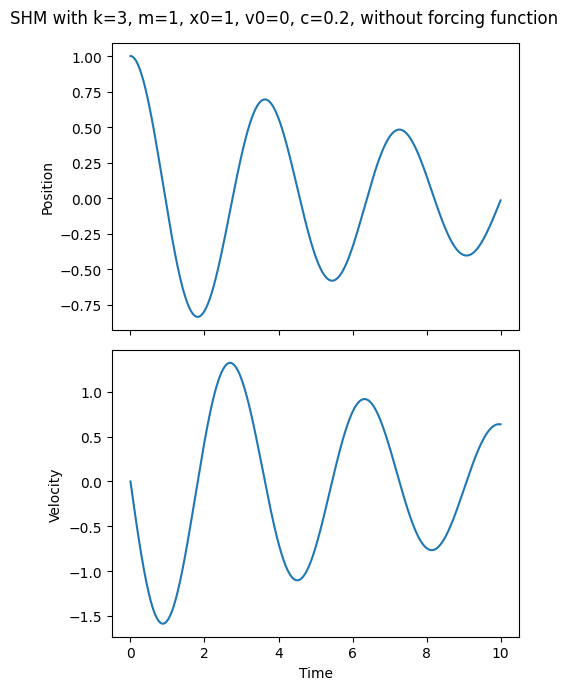

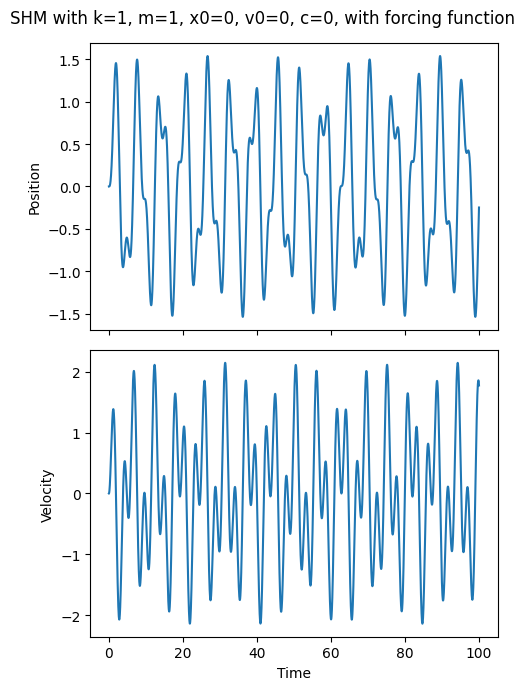

In [3]:
from scipy.integrate import solve_iv
import numpy as np  #  # Import Import numpy numpy for for numerical numerical operations operations
import matplotlib.pyplot as plt
import math

def get_shm_motion(output_times, spring_constant, mass, initial_position=0, initial_velocity=0, forcing_function=None, damping_coefficient=0):
    def gradient_function(t, y, spring_constant, mass, forcing_function, damping_coefficient):
        position = y[0]
        velocity = y[1]
        return np.array([velocity, (forcing_function(t) - spring_constant * position - damping_coefficient * velocity) / mass])
    
    forced = forcing_function is not None
    
    if forcing_function is None:
        forcing_function = lambda t: 0

    results = solve_ivp(gradient_function, [output_times[0], output_times[-1]], [initial_position, initial_velocity], args=(spring_constant, mass, forcing_function, damping_coefficient), t_eval=output_times)

    if not results.success:
        class IntegrationError(Exception):
            pass
        raise IntegrationError("Integration failed")

    fig, axs = plt.subplots(2, 1, figsize=(5, 7), sharex=True)

    axs[0].plot(results.t, results.y[0])
    axs[0].set_ylabel("Position")

    axs[1].plot(results.t, results.y[1])
    axs[1].set_ylabel("Velocity")

    axs[1].set_xlabel("Time")

    title = f"SHM with k={spring_constant}, m={mass}, x0={initial_position}, v0={initial_velocity}, c={damping_coefficient}"
    if forced:
        title += ", with forcing function"
    else:
        title += ", without forcing function"

    fig.suptitle(title)
    
    fig.tight_layout()

    return results.t, results.y


output_times = np.linspace(0, 10, 1000)
get_shm_motion(output_times, 3, 1, 1, damping_coefficient=0.2)

output_times = np.linspace(0, 100, 10000)
forcing_function = lambda t: 2 * math.sin(2.3 * t)
get_shm_motion(output_times, 1, 1, forcing_function=forcing_function);


## Learning Programming

Copilot cannot replace studying and practicing programming. But it can be a very useful supplementary tool that can provide another perspective on a coding construct, technique, or convention. You could pick a topic you're interested in, ask it to explain a concept you're learning about in another way (such as in a course), or ask open-ended questions like "What is a good way to do [X] in [language]?" or "What are some common mistakes people make when using [X] in [language]?". Experiment, and see what you can learn!

If you ask Copilot direct questions such as "Explain Python list comprehensions to me" or "What is a decorator in Python?" and it will provide a brief explanation. You can also ask it to generate code examples for you to study, or ask follow up questions to clarify its explanation. It may be necessary to specify the language you are interested in, as Copilot may not be able to infer it from the context.

If you've asked Copilot to explain a piece of code and it involves techniques you're not familiar with, you can also ask it to elaborate on those techniques. This enables you to segue from understanding a specific piece of code you've come across to learning more about the language or programming in general. This can be a very natural way to learn.

### Exercise: Learning Programming

Ask Copilot to explain a programming concept, technique or construct you've heard of, but don't fully understand. Ask it to provide examples, or to explain the concept in a different way. Ask follow-up questions to clarify your understanding. If you want some suggestions of topics to ask about, you could ask about:

* Error-handling
* The Python ```yield``` keyword
* Compressed row storage matrices
* Decorators in Python
* Python list comprehensions
* Python dictionaries